## TASK 1
# 1.1 Dataset Overview and Descriptive Statistics 

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [4]:
df = pd.read_csv("../Assignment-2/data/breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.29140,0.16090,0.3029,0.08216
1,2,B,11.50,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,12.97,22.46,83.12,508.9,0.1183,0.1049,0.08105,0.06544,0.2740,NaN
2,3,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.23220,0.11190,0.2809,0.06287
3,4,M,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.39120,0.17080,0.3007,0.08314
4,5,B,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,...,13.74,19.93,88.81,585.4,0.1483,NaN,0.22410,0.10560,0.3380,0.09584


In [5]:
# Shape and columns
print("\nDataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

# Data types and nulls
print("\nData types and null values:")
df.info()

# Descriptive statistics
print("\nDescriptive statistics for numerical features:")
display(df.describe())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Handle missing values if any exist
if missing_values.sum() > 0:
    # For this dataset, we'll drop rows with missing values if they're few
    # Alternatively, we could impute with median/mean
    df = df.dropna()
    print("\nRows with missing values have been dropped.")
else:
    print("\nNo missing values found in the dataset.")


Dataset shape: (512, 32)

Column names: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Data types and null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       512 non-null    int64  
 1   diagnosis                512 non-null    object 
 2   radius_mean              505 non-null  

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,512.000000,505.00000,507.000000,507.000000,508.000000,506.000000,511.000000,502.000000,504.000000,507.000000,...,507.000000,510.000000,505.000000,505.000000,507.000000,503.000000,508.000000,501.000000,509.000000,505.000000
mean,256.500000,14.17355,19.364142,92.231933,657.616929,0.096168,0.103624,0.088031,0.048893,0.181339,...,16.313700,25.754941,107.876515,889.918812,0.131889,0.251145,0.272561,0.114208,0.289997,0.083879
std,147.945936,3.55379,4.314426,24.584304,357.110765,0.014208,0.053119,0.080220,0.039362,0.027501,...,4.885558,6.152356,34.106884,579.834235,0.023130,0.155159,0.209698,0.065945,0.061297,0.018044
min,1.000000,6.98100,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,128.750000,11.71000,16.195000,75.235000,420.175000,0.085843,0.064130,0.028835,0.019983,0.162100,...,12.980000,21.222500,84.160000,514.000000,0.114750,0.143700,0.116625,0.064130,0.250600,0.071470
50%,256.500000,13.40000,18.890000,86.340000,548.750000,0.095200,0.091820,0.059640,0.033455,0.179200,...,14.980000,25.445000,97.900000,686.600000,0.131100,0.211800,0.225450,0.099100,0.281800,0.079930
75%,384.250000,15.78000,21.830000,104.200000,784.150000,0.105250,0.129850,0.128650,0.073460,0.195700,...,19.125000,30.015000,127.100000,1124.000000,0.146000,0.328050,0.385300,0.161300,0.317600,0.092030
max,512.000000,28.11000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



Number of duplicate rows: 0

Missing values per column:


radius_mean                 7
texture_mean                5
perimeter_mean              5
area_mean                   4
smoothness_mean             6
compactness_mean            1
concavity_mean             10
concave points_mean         8
symmetry_mean               5
fractal_dimension_mean      3
radius_se                   2
texture_se                  7
perimeter_se                1
area_se                     3
smoothness_se               6
compactness_se              4
concavity_se                2
concave points_se           4
symmetry_se                 5
fractal_dimension_se        5
radius_worst                5
texture_worst               2
perimeter_worst             7
area_worst                  7
smoothness_worst            5
compactness_worst           9
concavity_worst             4
concave points_worst       11
symmetry_worst              3
fractal_dimension_worst     7
dtype: int64


Rows with missing values have been dropped.


### Missing Value Treatment

In [9]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df):
    """
    Imputes missing values in the dataset using median imputation.
    Assumes the target column is named 'target' and should not be imputed.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame with possible missing values.

    Returns:
        pd.DataFrame: DataFrame with imputed values.
    """
    # Separate features and target
    if 'diagnosis' in df.columns:
        features = df.drop(columns=['diagnosis'])
        target = df['diagnosis']
    else:
        features = df
        target = None

    # Impute missing values with median
    imputer = SimpleImputer(strategy='median')
    imputed_features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

    # Reattach target column if it was separated
    if target is not None:
        imputed_features['diagnosis'] = target.values

    return imputed_features


df = impute_missing_values(df)

if missing_values.sum() > 0:
    # For this dataset, we'll drop rows with missing values if they're few
    # Alternatively, we could impute with median/mean
    df = df.dropna()
    print("\nRows with missing values have been dropped.")
else:
    print("\nNo missing values found in the dataset.")



Rows with missing values have been dropped.



Class distribution:


diagnosis
B    0.640625
M    0.359375
Name: proportion, dtype: float64

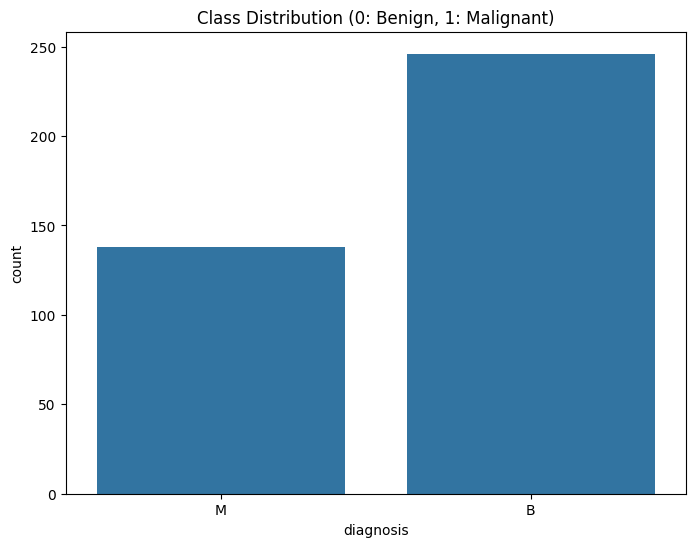

In [10]:
# Class distribution
print("\nClass distribution:")
class_dist = df['diagnosis'].value_counts(normalize=True)
display(class_dist)

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution (0: Benign, 1: Malignant)')
plt.show()


## 1.2 Feauture Assessment and Visualization 

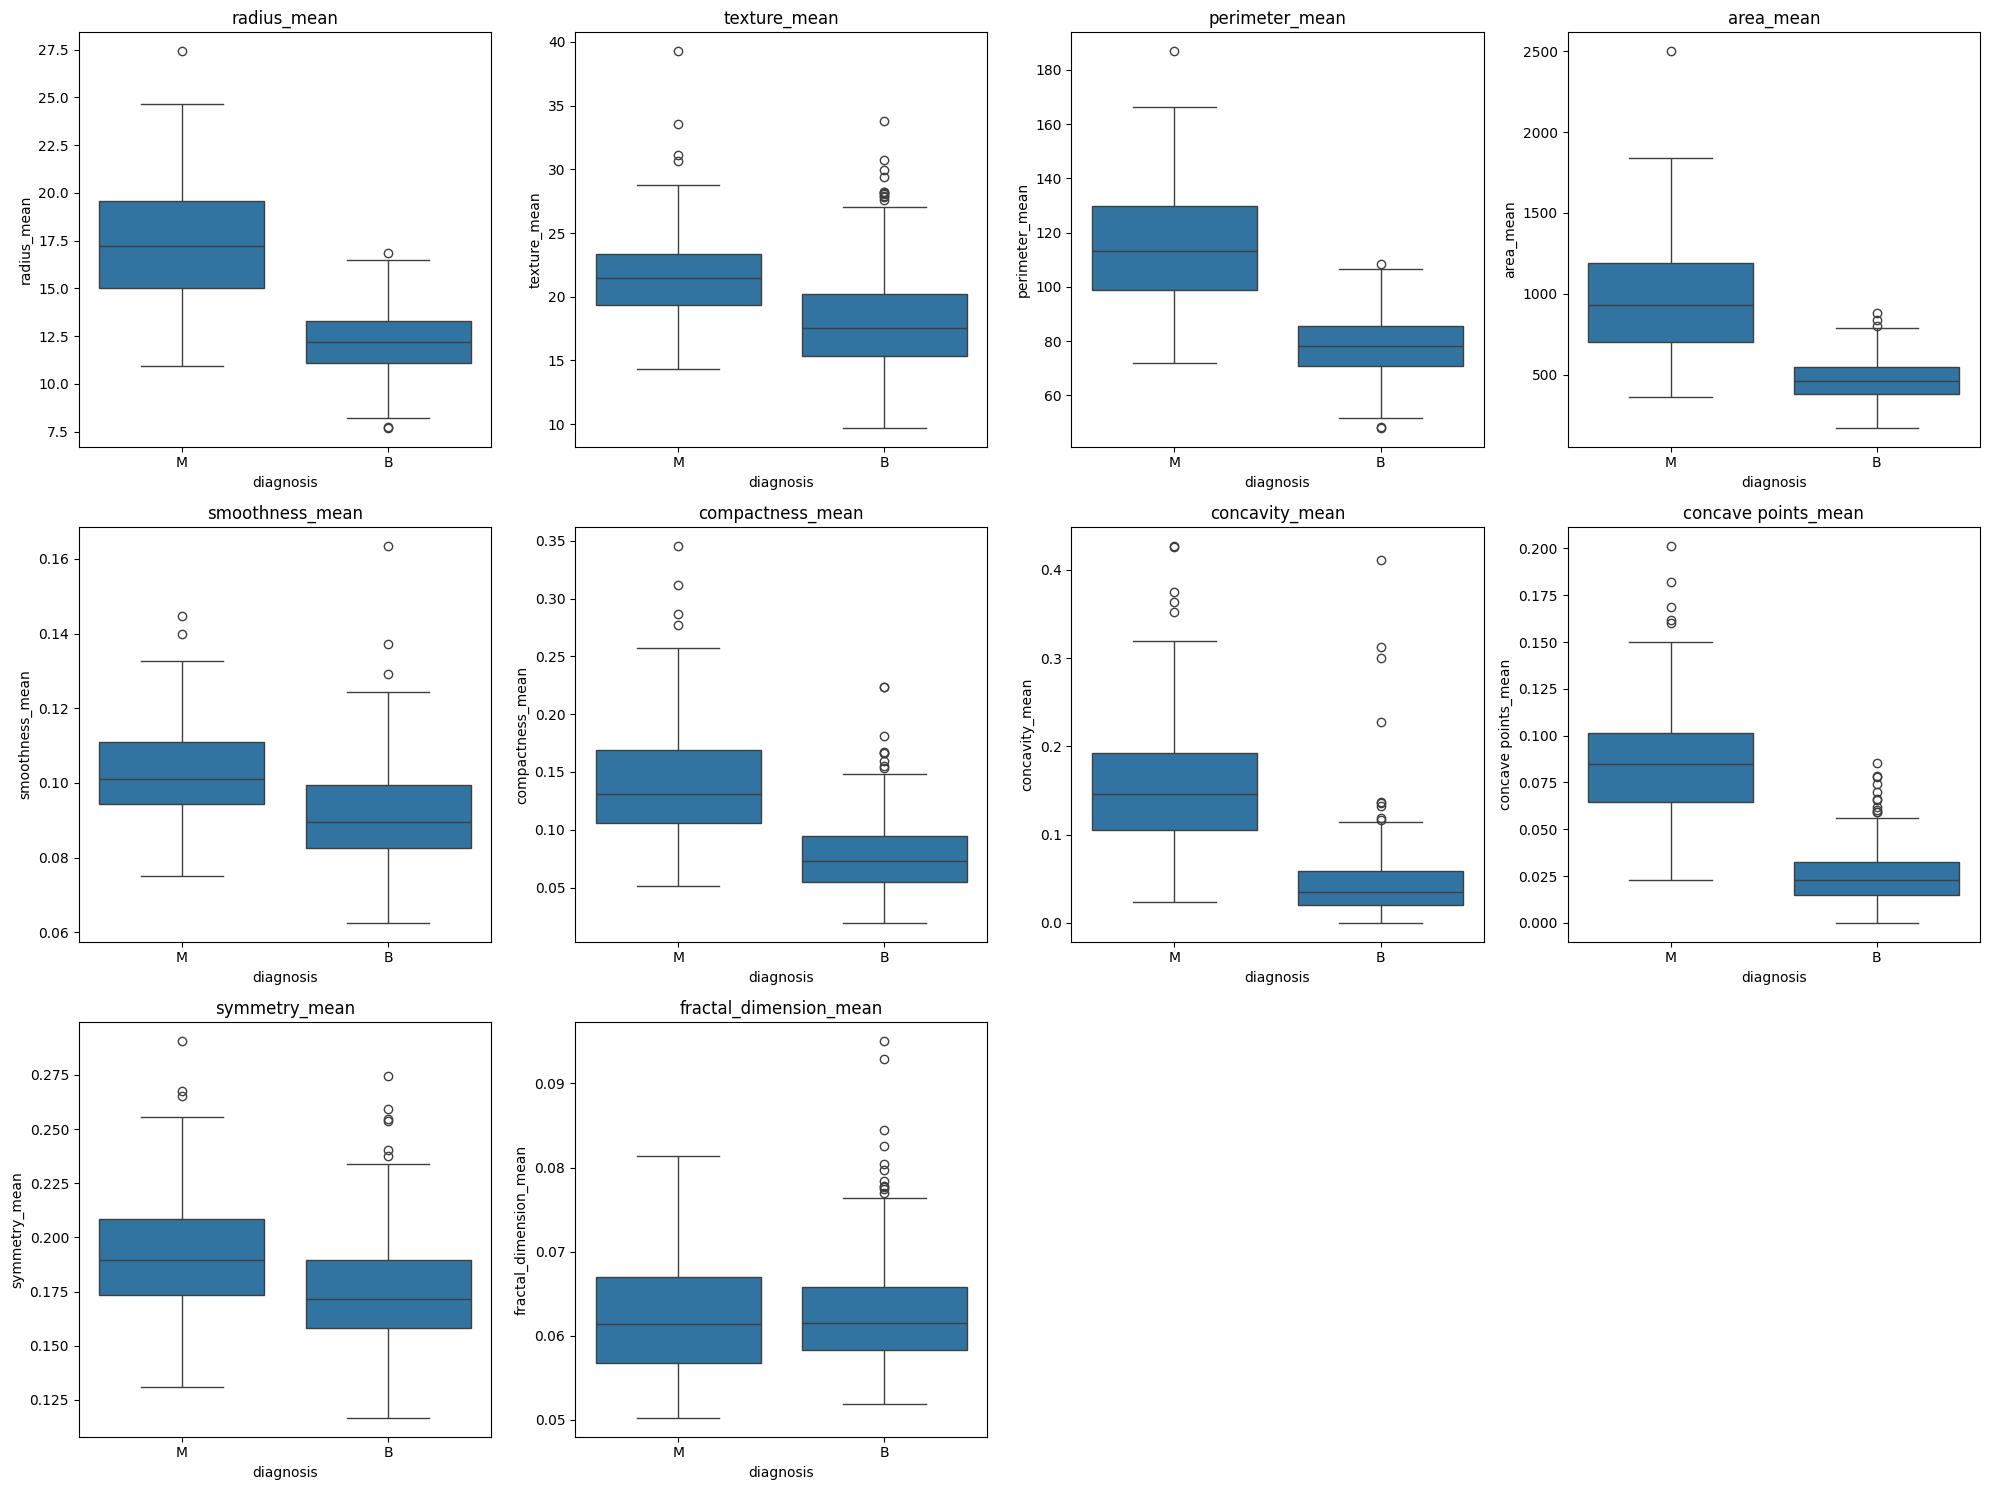

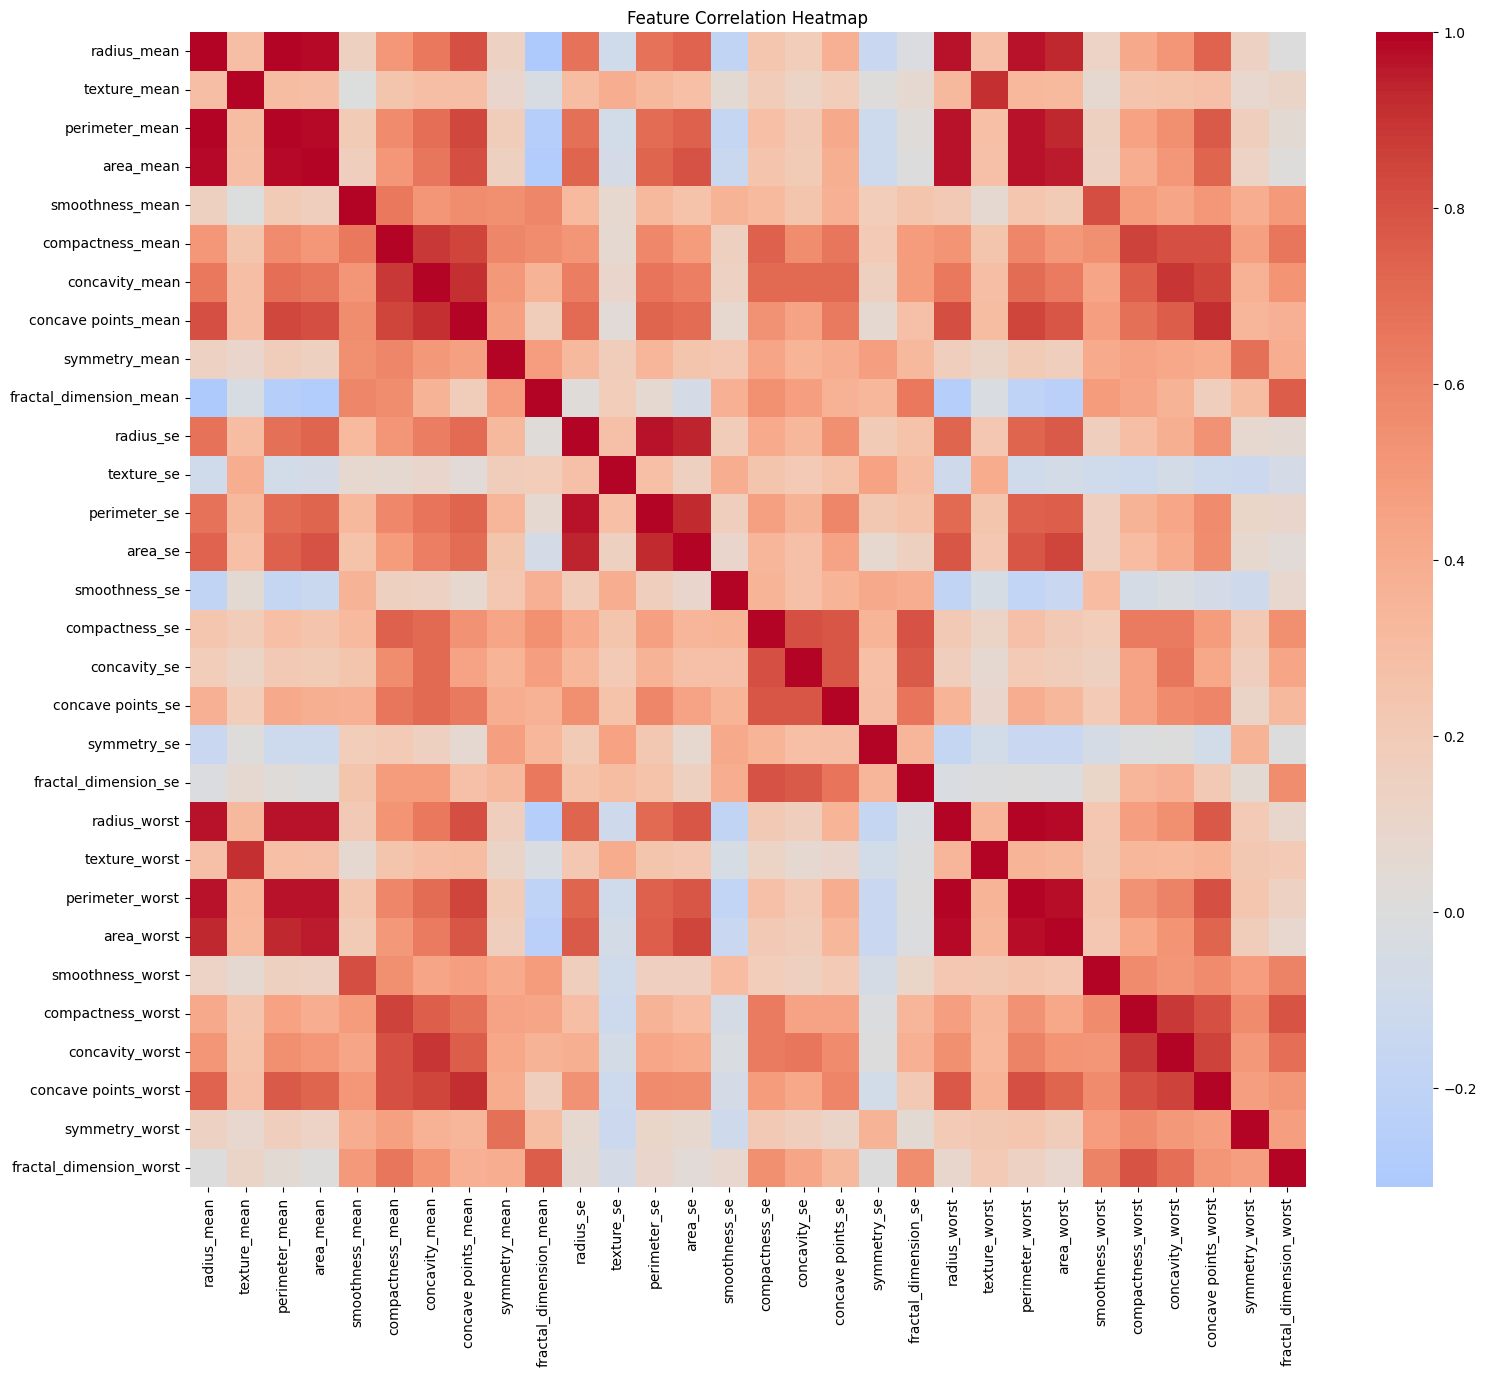


Highly correlated features (|correlation| > 0.9):


,level_0,level_1,0
2,radius_mean,perimeter_mean,0.997577
60,perimeter_mean,radius_mean,0.997577
622,radius_worst,perimeter_worst,0.993361
680,perimeter_worst,radius_worst,0.993361
3,radius_mean,area_mean,0.987736
90,area_mean,radius_mean,0.987736
92,area_mean,perimeter_mean,0.986995
63,perimeter_mean,area_mean,0.986995
623,radius_worst,area_worst,0.981642
710,area_worst,radius_worst,0.981642


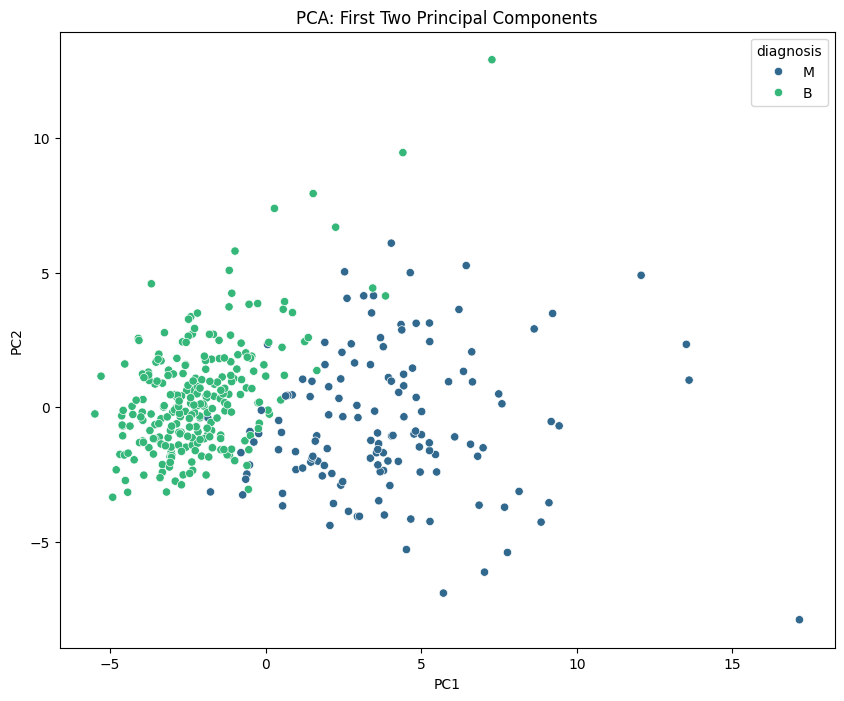


Explained variance ratio for first 5 components:


,Component,Explained Variance
0,PC1,0.442988
1,PC2,0.185373
2,PC3,0.097643
3,PC4,0.064718
4,PC5,0.057634


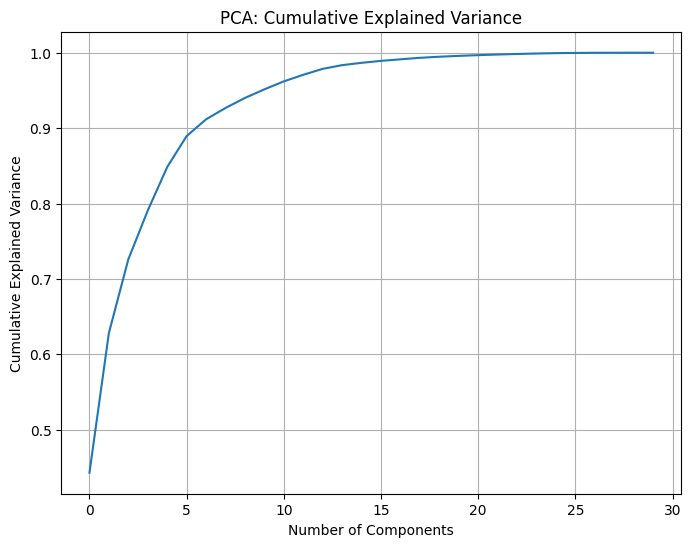

In [12]:
# Separate features from target
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Box plots for feature distributions by diagnosis
plt.figure(figsize=(20, 15))
for i, column in enumerate(X.columns[:10]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=y, y=X[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Correlation analysis
corr_matrix = X.corr()

# Heatmap of feature correlations
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

# Most correlated features (absolute value > 0.9)
high_corr = corr_matrix.abs().stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr = high_corr.sort_values(0, ascending=False)
high_corr = high_corr[high_corr[0] > 0.9]
print("\nHighly correlated features (|correlation| > 0.9):")
display(high_corr.head(10))

# Dimensionality reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca[:, :2], columns=['PC1', 'PC2'])
pca_df['diagnosis'] = y.reset_index(drop=True)

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=pca_df, palette='viridis')
plt.title('PCA: First Two Principal Components')
plt.show()

# Explained variance ratio
print("\nExplained variance ratio for first 5 components:")
display(pd.DataFrame({
    'Component': ['PC'+str(i+1) for i in range(5)],
    'Explained Variance': pca.explained_variance_ratio_[:5]
}))

# Cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance')
plt.grid()
plt.show()

### Data Saving

In [14]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['diagnosis'] = y.values
X_scaled_df.to_csv("../data/breast_cancer_final.csv", index=False)
